<a href="https://colab.research.google.com/github/HungPham2002/Genetic-Algorithms-optimization-and-Linear-Regression-problems/blob/main/Genetic_Algorithms_To_Solve_Linear_Regression_Problems.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# House Price Prediction

In [150]:
import random
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt

data = genfromtxt('/content/drive/MyDrive/Colab_Notebooks/AIO main lesson/Genetic Algorithm (linear regression/data.csv', delimiter=',', skip_header=1)
X = data[:,:1]
y = data[:,1]

X = np.c_[np.ones((X.shape[0],1)), X]
print(X)
print(y)

[[1.   1.2 ]
 [1.   1.86]
 [1.   2.09]
 [1.   3.05]
 [1.   4.69]
 [1.   3.57]
 [1.   5.55]
 [1.   2.39]
 [1.   3.94]]
[2.43 2.91 3.41 4.71 5.94 5.4  7.04 3.38 5.29]


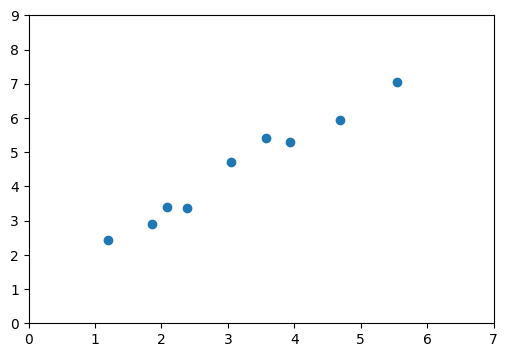

In [151]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6, 4))
ax.set_ylim((0, 9))
ax.set_xlim((0, 7))

plt.scatter(X[:, 1], y)
plt.show()

In [152]:
def generate_random_value(bound=100):
    return (random.random() * 2 - 1) * bound

def compute_loss(individual):
    theta = np.array(individual)
    y_hat = X.dot(theta)
    loss = np.multiply((y_hat - y), (y_hat - y)).mean()
    return loss

def compute_fitness(individual):
    loss = compute_loss(individual)
    fitness = 1 / (loss + 0.0001)
    return fitness

In [153]:
def create_individual():
    return [generate_random_value() for _ in range(n)]

def crossover(individual1, individual2, crossover_rate=0.9):
    individual1_new = individual1.copy()
    individual2_new = individual2.copy()

    for i in range(n):
        if random.random() < crossover_rate:
            individual1_new[i] = individual2[i]
            individual2_new[i] = individual1[i]

    return individual1_new, individual2_new

def mutate(individual, mutation_rate=0.05):
    individual_m = individual.copy()

    for i in range(n):
        if random.random() < mutation_rate:
            individual_m[i] = generate_random_value()

    return individual_m

def selection(sorted_old_population):
    index1 = random.randint(0, m - 1)
    index2 = random.randint(0, m - 1)

    while index2 == index1:
        index2 = random.randint(0, m - 1)

    individual_s = sorted_old_population[index1]
    if index2 > index1:
        individual_s = sorted_old_population[index2]

    return individual_s

In [155]:
n = 2                  # size of individual (chromosome)
m = 100                # size of population
n_generations = 3000   # number of generations
losses = []            # để vẽ biểu đồ quá trình tối ưu

######################### algorithm  #########################
# step 1: create initial population
population = [create_individual() for _ in range(m)]

#==== loops
elitism = 2
for i in range(n_generations):
    sorted_population = sorted(population, key=compute_fitness)

    if i%100 == 0:
        losses.append(compute_loss(sorted_population[-1]))
        print("Best loss:", compute_loss(sorted_population[-1]), sorted_population[-1])

    # create new_population
    new_population = sorted_population[-elitism:]

    while len(new_population) < m:
        # selection
        individual_s1 = selection(sorted_population)
        individual_s2 = selection(sorted_population) # duplication

        # crossover
        individual_c1, individual_c2 = crossover(individual_s1, individual_s2)

        # mutation
        individual_m1 = mutate(individual_c1)
        individual_m2 = mutate(individual_c2)

        new_population.append(individual_m1)
        new_population.append(individual_m2)

    # update population
    population = new_population

Best loss: 517.3399855688084 [-51.543465949715014, 12.415923749691316]
Best loss: 23.554742966084692 [-11.245005781460616, 4.274419717796452]
Best loss: 15.766324063449291 [-9.02017451263719, 3.8633468683008987]
Best loss: 1.0555350503246261 [-1.4437798769082022, 1.7934025611785032]
Best loss: 0.9670200133075871 [-1.1555887973938583, 1.7934025611785032]
Best loss: 0.4714552613712436 [-0.5151128499922608, 1.476276649410524]
Best loss: 0.4714552613712436 [-0.5151128499922608, 1.476276649410524]
Best loss: 0.33633778345410653 [-0.15016681624739903, 1.476276649410524]
Best loss: 0.33633778345410653 [-0.15016681624739903, 1.476276649410524]
Best loss: 0.2962055621755779 [-0.15016681624739903, 1.429296367167776]
Best loss: 0.2962055621755779 [-0.15016681624739903, 1.429296367167776]
Best loss: 0.2962055621755779 [-0.15016681624739903, 1.429296367167776]
Best loss: 0.2962055621755779 [-0.15016681624739903, 1.429296367167776]
Best loss: 0.27421940790607047 [-0.025831783360552585, 1.42929636716

In [156]:
sorted_population = sorted(population, key=compute_fitness)
print(sorted_population[-1])

[0.18287642238996593, 1.3724908953737458]


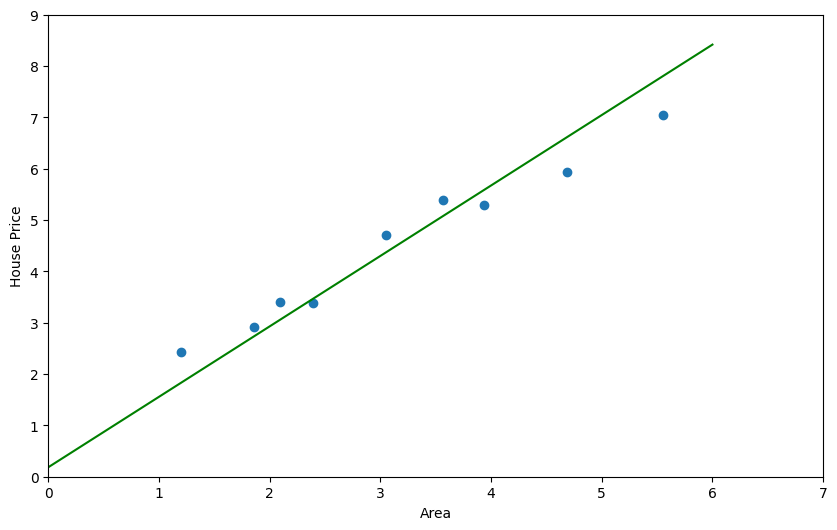

In [157]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_ylim((0, 9))
ax.set_xlim((0, 7))

plt.scatter(X[:, 1], y)
plt.ylabel('House Price')
plt.xlabel('Area')

x_data = list(range(0, 7))
y_data = [1.3724908953737458*x + 0.18287642238996593 for x in x_data]
plt.plot(x_data, y_data,c='green')
plt.show()

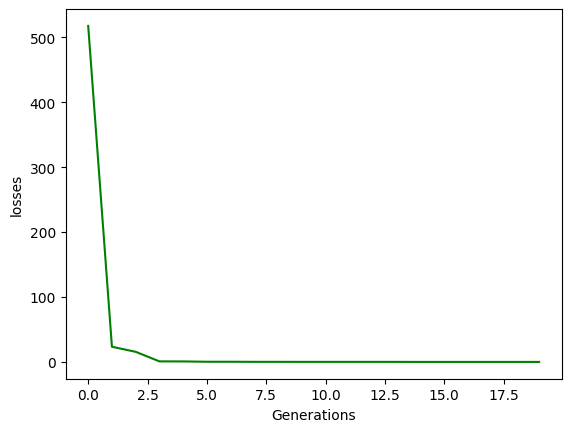

In [158]:
import matplotlib.pyplot as plt

plt.plot(losses[:20], c='green')
plt.xlabel('Generations')
plt.ylabel('losses')
plt.show()

# Diamond Price Prediction

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [80]:
data_df  = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/AIO main lesson/Diamond Price Forcasting/diamonds.csv')

## Data Exploration

In [ ]:
data_df.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
data_df = data_df.drop(['Unnamed: 0'], axis = 1)

In [ ]:
data_df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


array([[<Axes: title={'center': 'carat'}>,
        <Axes: title={'center': 'depth'}>,
        <Axes: title={'center': 'table'}>],
       [<Axes: title={'center': 'price'}>, <Axes: title={'center': 'x'}>,
        <Axes: title={'center': 'y'}>],
       [<Axes: title={'center': 'z'}>, <Axes: >, <Axes: >]], dtype=object)

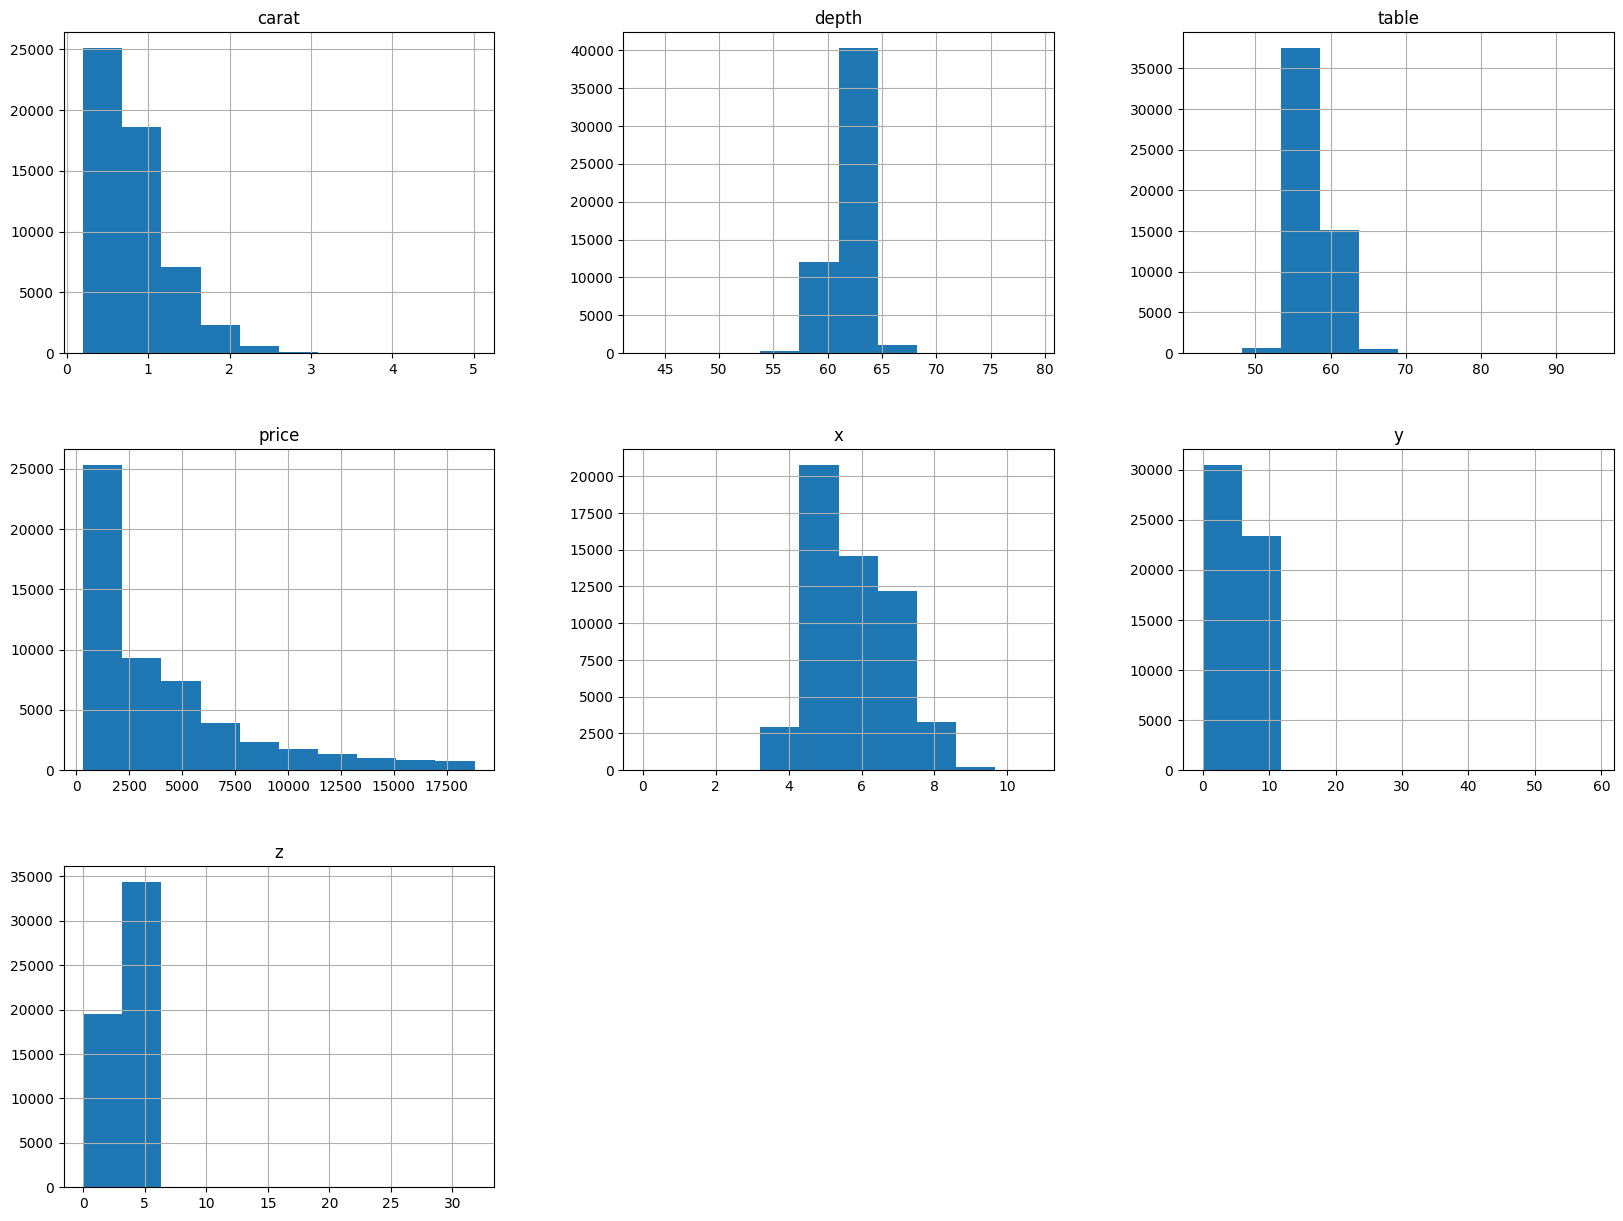

In [ ]:
from matplotlib import pyplot as plt
data_df.hist(figsize=(20,15))

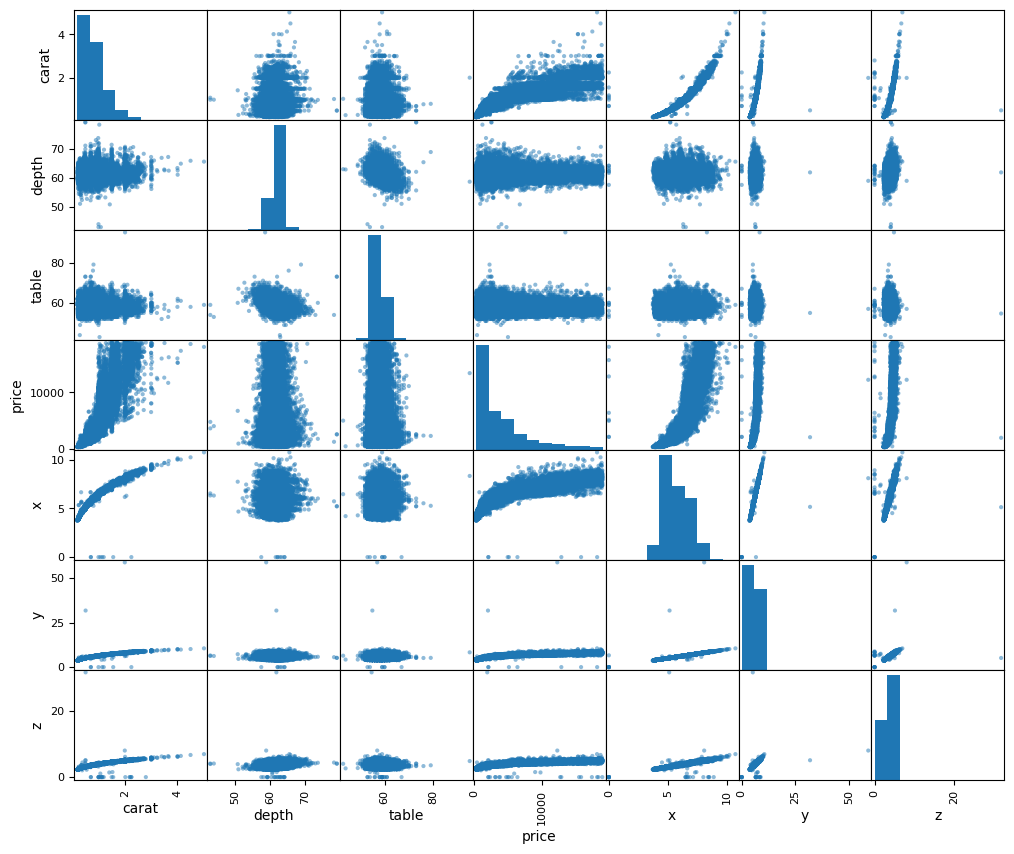

In [ ]:
from pandas.plotting import scatter_matrix

scatter_matrix(data_df, figsize=(12,10));

In [ ]:
color_mapping = {'J': 0, 'I': 1, 'H': 2, 'G': 3, 'F': 4, 'E': 5, 'D': 6}
data_df.color = data_df.color.map(color_mapping)

In [ ]:
# Encoding the ordinal cateogircal variable 'clarity'
clarity_mapping = {'I1': 0, 'SI2': 1, 'SI1': 2, 'VS2': 3, 'VS1': 4, 'VVS2': 5, 'VVS1': 6, 'IF': 7}
data_df.clarity = data_df.clarity.map(clarity_mapping)

In [ ]:
# Encode the ordinal categorical variable 'cut'
cut_mapping = {'Fair': 0, 'Good': 1, 'Very Good': 2, 'Premium': 3, 'Ideal': 4}
data_df.cut = data_df.cut.map(cut_mapping)

In [ ]:
data_df.describe()

,carat,cut,color,clarity,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,2.904097,3.405803,3.051020,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.116600,1.701105,1.647136,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,0.000000,0.000000,0.000000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,2.000000,2.000000,2.000000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,3.000000,3.000000,3.000000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,4.000000,5.000000,4.000000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,4.000000,6.000000,7.000000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [ ]:
data_df = data_df.drop(data_df[data_df["x"]==0].index)
data_df = data_df.drop(data_df[data_df["y"]==0].index)
data_df = data_df.drop(data_df[data_df["z"]==0].index)

In [ ]:
#Loại bỏ 1% giá trị lớn hơn phân vị 99%
data_df = data_df[data_df['depth'] < data_df['depth'].quantile(0.99)]
data_df = data_df[data_df['table'] < data_df['table'].quantile(0.99)]
data_df = data_df[data_df['x'] < data_df['x'].quantile(0.99)]
data_df = data_df[data_df['y'] < data_df['y'].quantile(0.99)]
data_df = data_df[data_df['z'] < data_df['z'].quantile(0.99)]

In [ ]:
data_df.head(10)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,4,5,1,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,5,2,59.8,61.0,326,3.89,3.84,2.31
3,0.29,3,1,3,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,0,1,63.3,58.0,335,4.34,4.35,2.75
5,0.24,2,0,5,62.8,57.0,336,3.94,3.96,2.48
6,0.24,2,1,6,62.3,57.0,336,3.95,3.98,2.47
7,0.26,2,2,2,61.9,55.0,337,4.07,4.11,2.53
8,0.22,0,5,3,65.1,61.0,337,3.87,3.78,2.49
9,0.23,2,2,4,59.4,61.0,338,4.00,4.05,2.39
10,0.30,1,0,2,64.0,55.0,339,4.25,4.28,2.73


## Spliting Data

In [81]:
X = data_df.drop(['price'], axis=1)
y = data_df['price']

In [83]:
X_arr = X.to_numpy()
y_arr  = y.to_numpy()

In [84]:
print(X_arr.shape)
print(y_arr.shape)

(53940, 10)
(53940,)


In [ ]:
X_train = X_arr[:int(X_arr.shape[0]*0.8)]
y_train = y_arr[:int(X_arr.shape[0]*0.8)]
X_test = X_arr[int(X_arr.shape[0]*0.8):]
y_test = y_arr[int(X_arr.shape[0]*0.8):]

In [ ]:
xmean =  X_train.mean(axis = 0)
xstd = X_train.std(axis=0)
X_train = (X_train - xmean)/xstd
X_test = (X_test -  xmean)/xstd

In [ ]:
X_train = np.concatenate((np.ones((X_train.shape[0], 1)), X_train), axis=1)
X_test = np.concatenate((np.ones((X_test.shape[0], 1)), X_test), axis=1)

In [ ]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape )

(40904, 10) (40904,) (10226, 10) (10226,)


## Training

In [ ]:
def generate_random_value_diamond(bound = 100):
    return (random.random()*2 - 1)*bound

def compute_loss_diamond(individual):
    theta = np.array(individual)
    y_hat = X_train.dot(theta)
    loss = np.multiply((y_hat - y_train), (y_hat - y_train)).mean()
    return loss

def compute_fitness_diamond(individual):
    loss = compute_loss_diamond(individual)
    fitness = 1 / (loss + 0.0001)
    return fitness


In [ ]:
def create_individual_diamond():
    return [generate_random_value_diamond() for _ in range(n)] # generate function is same

def crossover_diamond(individual1, individual2, crossover_rate = 0.9):
    individual1_new = individual1.copy()
    individual2_new = individual2.copy()

    for i in range(n):
        if random.random() < crossover_rate:
            individual1_new[i] = individual2[i]
            individual2_new[i] = individual1[i]

    return individual1_new, individual2_new

def mutate_diamond(individual, mutation_rate = 0.05):
    individual_m = individual.copy()

    for i in range(n):
        if random.random() < mutation_rate:
            individual_m[i] = generate_random_value_diamond()

    return individual_m

def selection_diamond(sorted_old_population):
    index1 = random.randint(0, m-1)
    index2 = random.randint(0, m-1)

    while index2 == index1:
        index2 = random.randint(0, m-1)

    individual_s = sorted_old_population[index1]
    if index2 > index1:
        individual_s = sorted_old_population[index2]

    return individual_s

In [ ]:
n = 10                 # size of individual (chromosome)
m = 200                # size of population
n_generations = 8000   # number of generations
losses_diamond = []

######################### algorithm  #########################
# step 1: create initial population
population = [create_individual_diamond() for _ in range(m)]

#==== loops
elitism = 2
for i in range(n_generations):
    sorted_population = sorted(population, key=compute_fitness_diamond)

    if i % 100 == 0:
        losses_diamond.append(compute_loss_diamond(sorted_population[-1]))
        print("Generation:", i, "Best loss:", losses_diamond[-1])

    # create new_population
    new_population = sorted_population[-elitism:]

    while len(new_population) < m:
        # selection
        individual_s1 = selection_diamond(sorted_population)
        individual_s2 = selection_diamond(sorted_population) # duplication

        # crossover
        individual_c1, individual_c2 = crossover_diamond(individual_s1, individual_s2)

        # mutation
        individual_m1 = mutate_diamond(individual_c1)
        individual_m2 = mutate_diamond(individual_c2)

        new_population.append(individual_m1)
        new_population.append(individual_m2)

    # update population
    population = new_population


Generation: 0 Best loss: 27794364.57566253
Generation: 100 Best loss: 26518987.818994023
Generation: 200 Best loss: 26507263.205478508
Generation: 300 Best loss: 26502479.76081337
Generation: 400 Best loss: 26502391.376128532
Generation: 500 Best loss: 26502391.02767612
Generation: 600 Best loss: 26500627.078967556
Generation: 700 Best loss: 26500097.126097117
Generation: 800 Best loss: 26500054.778988
Generation: 900 Best loss: 26498765.441942137
Generation: 1000 Best loss: 26498734.32668511
Generation: 1100 Best loss: 26498354.52476777
Generation: 1200 Best loss: 26498354.52476777
Generation: 1300 Best loss: 26498354.52476777
Generation: 1400 Best loss: 26498240.457493827
Generation: 1500 Best loss: 26498240.457493827
Generation: 1600 Best loss: 26498239.469751045
Generation: 1700 Best loss: 26498239.469751045
Generation: 1800 Best loss: 26498239.469751045
Generation: 1900 Best loss: 26497968.79114855
Generation: 2000 Best loss: 26497968.79114855
Generation: 2100 Best loss: 26497968.

In [ ]:
best_individual_diamond = sorted_population[-1]
print("Best individual for Diamond price prediction:", best_individual_diamond)

Best individual for Diamond price prediction: [99.9933393671997, 99.99807257961417, -99.98358868022343, -99.99859835552549, -99.99454518614795, -70.29982217917552, 99.99836044635666, 99.99991045790135, 99.99600796597572, 99.99887393497626]


In [ ]:
sorted_population = sorted(population, key=compute_fitness_diamond)
print(sorted_population[-1])

[99.9933393671997, 99.99807257961417, -99.98358868022343, -99.99859835552549, -99.99454518614795, -70.29982217917552, 99.99836044635666, 99.99991045790135, 99.99600796597572, 99.99887393497626]


## Evaluation

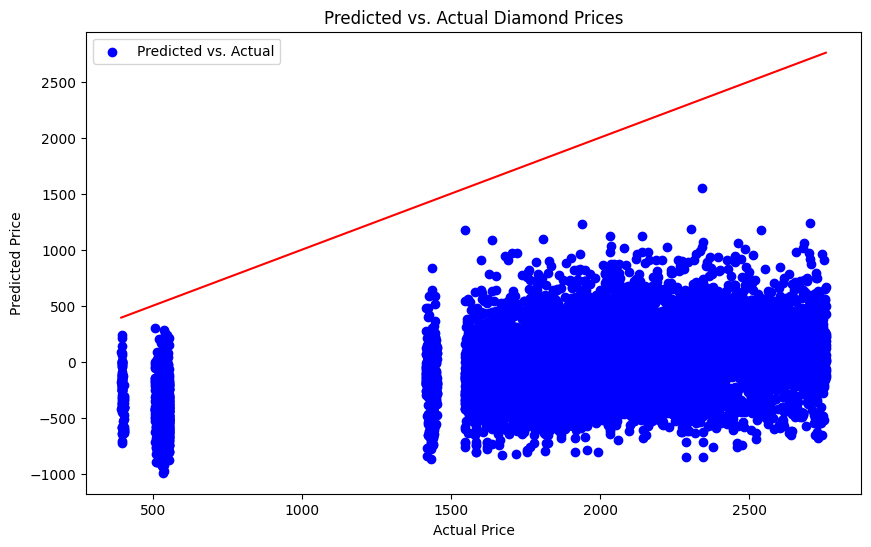

In [ ]:
import matplotlib.pyplot as plt

# Dự đoán giá trị dựa trên trọng số của cá thể tốt nhất và dữ liệu X_test
predicted_prices = X_test.dot(np.array(best_individual_diamond))

# Vẽ biểu đồ so sánh giá trị dự đoán và giá trị thực tế
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predicted_prices, c='blue', label='Predicted vs. Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r-')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Predicted vs. Actual Diamond Prices')
plt.legend()
plt.show()


In [ ]:
# Đánh giá trên tập test
li = np.mean((predicted_prices - y_test)*(predicted_prices - y_test))
print(f"MSE: {li}")

li = np.mean(np.abs(predicted_prices - y_test))
print(f"MAE: {li}")

MSE: 4100513.2146003605
MAE: 1956.023926236374




```
Model is underfitted. I will update it soon!
```



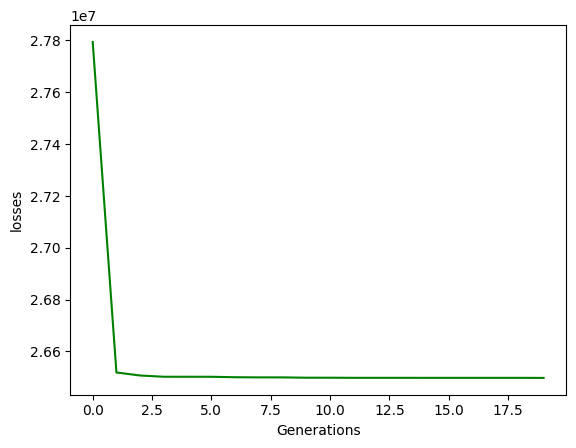

In [ ]:
import matplotlib.pyplot as plt

plt.plot(losses_diamond[:20], c='green')
plt.xlabel('Generations')
plt.ylabel('losses')
plt.show()

# Advertising Sales Prediction

In [17]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Load data

In [88]:
data = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/AIO main lesson/Linear Regression/advertising.csv',skiprows=1)
N = len(data)

In [30]:
print(N)

199


In [89]:
data

,230.1,37.8,69.2,22.1
0,44.5,39.3,45.1,10.4
1,17.2,45.9,69.3,12.0
2,151.5,41.3,58.5,16.5
3,180.8,10.8,58.4,17.9
4,8.7,48.9,75.0,7.2
...,...,...,...,...
194,38.2,3.7,13.8,7.6
195,94.2,4.9,8.1,14.0
196,177.0,9.3,6.4,14.8
197,283.6,42.0,66.2,25.5


In [90]:
X = data.iloc[:,:3]
y = data.iloc[:,3:]

In [45]:
y

,22.1
0,10.4
1,12.0
2,16.5
3,17.9
4,7.2
...,...
194,7.6
195,14.0
196,14.8
197,25.5


In [40]:
X

,230.1,37.8,69.2
0,44.5,39.3,45.1
1,17.2,45.9,69.3
2,151.5,41.3,58.5
3,180.8,10.8,58.4
4,8.7,48.9,75.0
...,...,...,...
194,38.2,3.7,13.8
195,94.2,4.9,8.1
196,177.0,9.3,6.4
197,283.6,42.0,66.2


## Data preprocessing

In [91]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X = scaler.fit_transform(X) # Normalize


In [101]:
y.shape, type(y)

((199, 1), pandas.core.frame.DataFrame)

In [102]:
y=y.to_numpy()

In [103]:
type(y)

numpy.ndarray

In [104]:
y=y.reshape(-1)

In [105]:
y.shape

(199,)

In [106]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [107]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((159, 3), (40, 3), (159,), (40,))

In [132]:
X_train = np.c_[np.ones((X_train.shape[0],1)), X_train]

In [136]:
X_train

array([[1.        , 0.85593507, 0.42943548, 0.26121372],
       [1.        , 0.76868448, 0.76008065, 0.27880387],
       [1.        , 0.8867095 , 0.07056452, 0.16886544],
       [1.        , 0.35136963, 0.11491935, 0.29991205],
       [1.        , 0.74332093, 0.66935484, 0.33069481],
       [1.        , 0.98816368, 0.57056452, 0.37730871],
       [1.        , 0.73621914, 0.55846774, 0.46701847],
       [1.        , 0.16672303, 0.23387097, 0.15919085],
       [1.        , 0.74264457, 0.98790323, 0.02550572],
       [1.        , 0.06323977, 0.32258065, 0.19349164],
       [1.        , 0.4582347 , 0.38709677, 0.14335972],
       [1.        , 0.19208657, 0.66129032, 0.20404573],
       [1.        , 0.41393304, 0.69758065, 0.1064204 ],
       [1.        , 0.26208996, 0.94354839, 0.30079156],
       [1.        , 0.36083869, 0.28225806, 0.09322779],
       [1.        , 0.24585729, 0.34274194, 0.11081794],
       [1.        , 0.66587758, 0.07056452, 0.04925242],
       [1.        , 0.06391613,

## Training

In [129]:
def generate_random_value(bound = 100):
    return (random.random()*2 - 1)*bound

def compute_loss(individual,X,y):
    theta = np.array(individual)
    y_hat = X.dot(theta)
    loss  = np.multiply((y_hat-y), (y_hat-y)).mean()
    return loss

def compute_fitness(individual,X,y):
    loss = compute_loss(individual,X,y)
    fitness = 1 / (loss + 0.0001)
    return fitness

In [128]:
def create_individual():
    return [generate_random_value() for _ in range(n)]

def crossover(individual1, individual2, crossover_rate = 0.9):
    individual1_new = individual1.copy()
    individual2_new = individual2.copy()

    for i in range(n):
        if random.random() < crossover_rate:
            individual1_new[i] = individual2[i]
            individual2_new[i] = individual1[i]

    return individual1_new, individual2_new

def mutate(individual, mutation_rate = 0.05):
    individual_m = individual.copy()

    for i in range(n):
        if random.random() < mutation_rate:
            individual_m[i] = generate_random_value()

    return individual_m

def selection(sorted_old_population):
    index1 = random.randint(0, m-1)
    index2 = random.randint(0, m-1)

    while index2 == index1:
        index2 = random.randint(0, m-1)

    individual_s = sorted_old_population[index1]
    if index2 > index1:
        individual_s = sorted_old_population[index2]

    return individual_s

In [137]:
n = 4                 # size of individual (chromosome)
m = 100                # size of population
n_generations = 3000   # number of generations
losses = []            # để vẽ biểu đồ quá trình tối ưu

######################### algorithm  #########################
# step 1: create initial population
population = [create_individual() for _ in range(m)]

#==== loops
elitism = 2
for i in range(n_generations):
    sorted_population = sorted(population, key=lambda ind: compute_fitness(ind, X_train, y_train))

    if i%100 == 0:
        losses.append(compute_loss(sorted_population[-1], X_train, y_train))
        print("Best loss:", compute_loss(sorted_population[-1], X_train, y_train), sorted_population[-1])

    # create new_population
    new_population = sorted_population[-elitism:]

    while len(new_population) < m:
        # selection
        individual_s1 = selection(sorted_population)
        individual_s2 = selection(sorted_population) # duplication

        # crossover
        individual_c1, individual_c2 = crossover(individual_s1, individual_s2)

        # mutation
        individual_m1 = mutate(individual_c1)
        individual_m2 = mutate(individual_c2)

        new_population.append(individual_m1)
        new_population.append(individual_m2)

    # update population
    population = new_population

Best loss: 96.21009848693782 [29.127256446030625, -1.2657863934014468, -11.11382726884289, -9.166052647928602]
Best loss: 3.47120507094528 [2.4561053755007833, 18.729717874118258, 5.525034239440152, 1.6858304701338422]
Best loss: 3.400385245505784 [2.5656761695712627, 18.604459286919074, 5.525034239440152, 1.793385705296835]
Best loss: 3.3448028221048274 [2.771440139571868, 18.604459286919074, 5.525034239440152, 1.5388372683059481]
Best loss: 3.1751992914088016 [3.013633074613953, 17.239527489798157, 5.525034239440152, 1.7659600557717203]
Best loss: 3.0545799525294606 [3.186003627517753, 17.239527489798157, 6.361066177564312, 0.568966605751231]
Best loss: 3.025736124255283 [3.323337167744689, 17.239527489798157, 6.361066177564312, 0.568966605751231]
Best loss: 3.025736124255283 [3.323337167744689, 17.239527489798157, 6.361066177564312, 0.568966605751231]
Best loss: 3.0221688792046337 [3.323337167744689, 17.239527489798157, 6.361066177564312, 0.40339145134375975]
Best loss: 3.0149367682

In [138]:
sorted_population = sorted(population, key=lambda ind: compute_fitness(ind, X_train, y_train))
print(sorted_population[-1])

[3.9475655129370457, 16.730625566851764, 5.637543569652004, 0.40014923708187045]


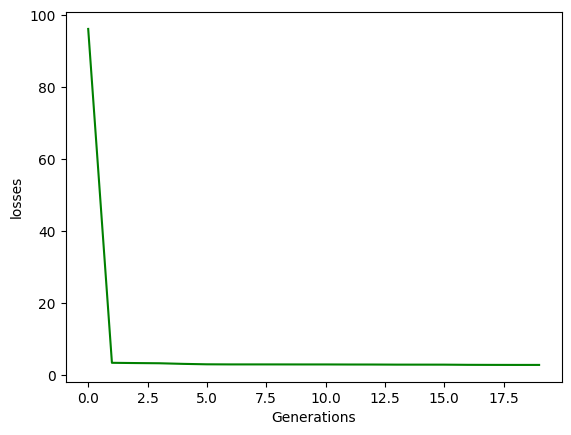

In [139]:
import matplotlib.pyplot as plt

plt.plot(losses[:20], c='green')
plt.xlabel('Generations')
plt.ylabel('losses')
plt.show()

## Evaluation

In [140]:
best_individual = sorted_population[-1]
best_weights = np.array(best_individual[:-1])
best_bias = best_individual[-1]

In [144]:
y_pred = X_test.dot(best_weights) + best_bias

In [145]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 37.541718153497605


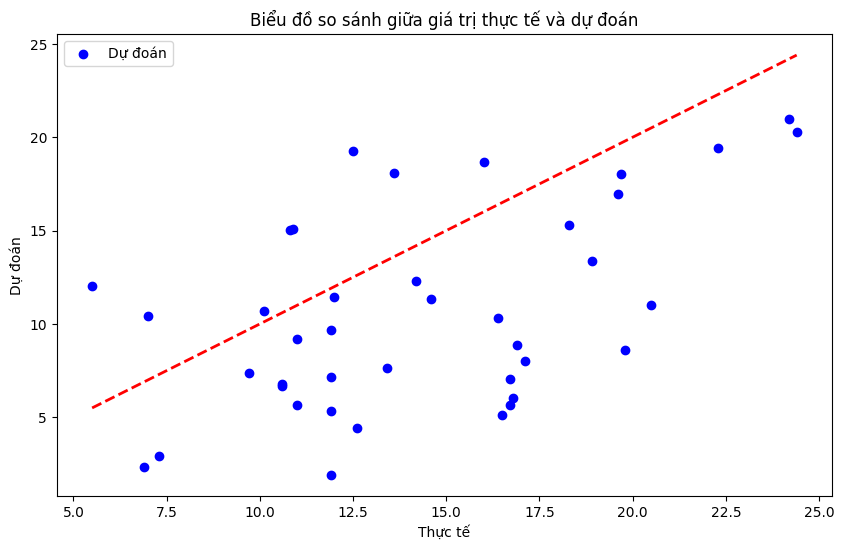

In [148]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Dự đoán')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2)
plt.xlabel('Thực tế')
plt.ylabel('Dự đoán')
plt.title('Biểu đồ so sánh giữa giá trị thực tế và dự đoán')
plt.legend()
plt.show()
